In [2]:
# %cd HW3 2
!pip install libsvm

     |████████████████████████████████| 174kB 16.1MB/s 
  Created wheel for libsvm: filename=libsvm-3.23.0.4-cp37-cp37m-linux_x86_64.whl size=233331 sha256=e011e03d34a3170cef2c58d691befdedd9b572d6e58589f05dd697fe201710e5
  Stored in directory: /root/.cache/pip/wheels/5e/9e/b5/dbb033107407eec2f52b8cd24cf024a4b9ec8b62ea5aee995a
Successfully built libsvm


In [4]:
!unzip /content/DogsVsCats.zip

Archive:  /content/DogsVsCats.zip
   creating: DogsVsCats/__MACOSX/
   creating: DogsVsCats/__MACOSX/DogsVsCats/
  inflating: DogsVsCats/__MACOSX/DogsVsCats/._.DS_Store  
   creating: DogsVsCats/DogsVsCats/
  inflating: DogsVsCats/DogsVsCats/.DS_Store  
  inflating: DogsVsCats/DogsVsCats/DogsVsCats.test  
  inflating: DogsVsCats/DogsVsCats/DogsVsCats.train  


In [ ]:
# read the training set.
y, x = svm_read_problem(train_path)
y1, x1 = svm_read_problem(test_path)

In [14]:
torch.cuda.get_device_name(0)

'Tesla T4'

In [ ]:
from libsvm.commonutil import svm_read_problem
from libsvm.svmutil import *
from libsvm.svm import *
import tqdm
import time
from sklearn.model_selection import KFold
import numpy as np
import math
import torch
from matplotlib import pyplot as plt

## SVM Accuracy and Cross-Validation for Model Selection

In [76]:
linear_type = '0'
polunomial_type = '1'

In [ ]:
train_path = '/content/DogsVsCats/DogsVsCats/DogsVsCats.train'
test_path = '/content/DogsVsCats/DogsVsCats/DogsVsCats.test'

### Define model

In [77]:

model_linear = svm_train(y, x, f'-t {linear_type}')
model_poly = svm_train(y, x, f'-t {polunomial_type}')

### Predict

In [78]:
# Predict Model

print('Linear Kernel')
p_label, p_acc, p_val = svm_predict(y1, x1, model_linear)
print(f'p_label', p_label)
print(f'p_acc', p_acc)
print(f'p_val', p_val)


print('Polynomial Kernel')
p_label, p_acc, p_val = svm_predict(y1, x1, model_poly)
print(f'p_label', p_label)
print(f'p_acc', p_acc)
print(f'p_val', p_val)


Linear Kernel
Accuracy = 59.2% (7400/12500) (classification)
p_label [-1.0, 1.0, -1.0, 1.0, -1.0, -1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, -1.0, 1.0, 1.0, 

### The Linear kernel give better accuracy

## Cros Validation

In [126]:
kf = KFold(10, True)
i = 1

linear_acc = []
poly_acc = []
for train_index, test_index in kf.split(x):

    x_test = np.array(x)[test_index]
    x_train = np.array(x)[train_index]
    y_test = np.array(y)[test_index]
    y_train = np.array(y)[train_index]

    print('Iter #:' + str(i) + '')
    
    print('Linear Model')
    model_linear = svm_train(y_train, x_train, '-t 0')
    p_label, p_acc, p_val = svm_predict(y_test, x_test, model_linear)
    linear_acc.append(p_acc)

    print('Poly Model')
    model_poly = svm_train(y_train, x_train, '-t 1')
    p_label, p_acc, p_val = svm_predict(y_test, x_test, model_poly)
    poly_acc.append(p_acc)

    i = i + 1

Iter #:1
Linear Model
Accuracy = 61.12% (764/1250) (classification)
Poly Model
Accuracy = 48.32% (604/1250) (classification)
Iter #:2
Linear Model
Accuracy = 58.88% (736/1250) (classification)
Poly Model
Accuracy = 47.76% (597/1250) (classification)
Iter #:3
Linear Model
Accuracy = 62.4% (780/1250) (classification)
Poly Model
Accuracy = 49.2% (615/1250) (classification)
Iter #:4
Linear Model
Accuracy = 58.96% (737/1250) (classification)
Poly Model
Accuracy = 48.88% (611/1250) (classification)
Iter #:5
Linear Model
Accuracy = 59.36% (742/1250) (classification)
Poly Model
Accuracy = 48.56% (607/1250) (classification)
Iter #:6
Linear Model
Accuracy = 57.6% (720/1250) (classification)
Poly Model
Accuracy = 49.68% (621/1250) (classification)
Iter #:7
Linear Model
Accuracy = 61.44% (768/1250) (classification)
Poly Model
Accuracy = 49.68% (621/1250) (classification)
Iter #:8
Linear Model
Accuracy = 58% (725/1250) (classification)
Poly Model
Accuracy = 49.6% (620/1250) (classification)
Iter #:

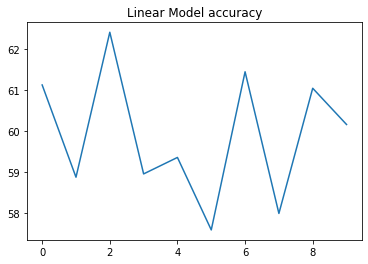

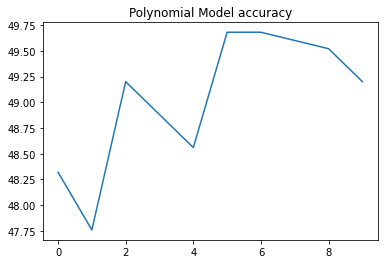

In [136]:
plt.plot([x[0] for x in linear_acc])
plt.title("Linear Model accuracy")
# plt.plot([x[0] for x in poly_acc], label = "Polynomial Modle accuracy")
plt.show()

plt.plot([x[0] for x in poly_acc])
plt.title("Polynomial Model accuracy")
# plt.plot([x[0] for x in poly_acc], label = "Polynomial Modle accuracy")
plt.show()

### The linear model give better accuracy, byt Linear model showed overfitted and Polynomial accuracy as more K

## AdaBoost

In [109]:
torch.set_printoptions(precision=20)

In [1]:
def adaboost(K, input, target, predict):
    # init
    weight =  torch.as_tensor([1 / len(input)] * len(input))
    alphas = []
    errors = []
    for i in tqdm.tqdm(range(1000)):
      time.sleep(0.01)
      for idx in range(K):
        print(f'start k #', idx)

      # get current different
        tmp = target - predict
        
        delta = (tmp > 0).float()
        error_rate = torch.dot(weight, delta)
        alpha = 1/2 * (math.log((1-error_rate)/error_rate))

        alphas.append(alpha)
        errors.append(error_rate)

        weight = (weight*(math.exp(alpha)))/sum(weight*(math.exp(alpha)))
    
    
    print('finish')
    return alphas, errors

start k # 0
start k # 1
start k # 2
start k # 3
start k # 4
start k # 5
start k # 6
start k # 7
start k # 8
start k # 9
finish


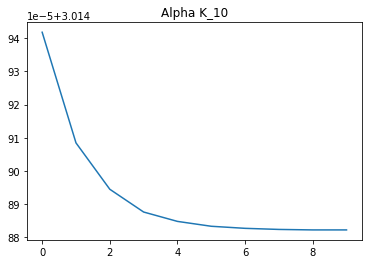

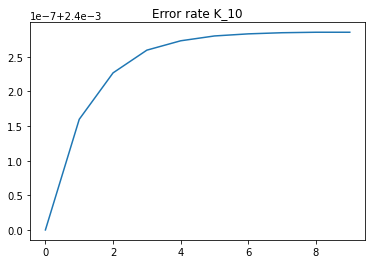

In [118]:
alphas_10, erros_10 = adaboost(10, x1, torch.as_tensor(y1), torch.as_tensor(p_label))
plt.plot(alphas_10)
plt.title('Alpha K_10')
plt.show()

plt.plot(erros_10)
plt.title('Error rate K_10')
plt.show()

start k # 0
start k # 1
start k # 2
start k # 3
start k # 4
start k # 5
start k # 6
start k # 7
start k # 8
start k # 9
start k # 10
start k # 11
start k # 12
start k # 13
start k # 14
start k # 15
start k # 16
start k # 17
start k # 18
start k # 19
finish


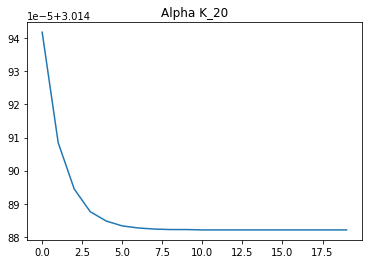

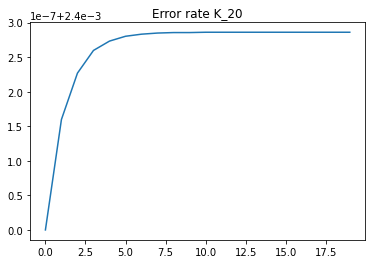

In [119]:
alphas_20, erros_20 = adaboost(20, x1, torch.as_tensor(y1), torch.as_tensor(p_label))
plt.plot(alphas_20)
plt.title('Alpha K_20')
plt.show()

plt.plot(erros_20)
plt.title('Error rate K_20')
plt.show()

#### the error rates still decrease as we increase the K size so they are expected